In [19]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('./files/data_toal.csv')

In [21]:
df

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200104051524,20200104052439,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,죽도시장,129.365486,36.034110
1,20200104051607,20200104053502,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
2,20200104051838,20200104052941,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,준양주택3차,129.403063,35.960871,청림초등학교,129.405275,35.993257
3,20200104052127,20200104052430,200,양덕-남구청(야구장)-구룡포,청소년,N,N,환호해맞이그린빌,129.392404,36.068838,두호동주민센터,129.378910,36.060370
4,20200104052229,20200104053228,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,129.371202,36.064088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841678,20200117233637,20200117234814,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,건강가정다문화센터,129.365460,36.047810,남부시장,129.357100,36.013360
841679,20200117233746,20200117234246,109,양덕-시외터미널-위덕대(유강),일반,N,N,육거리,129.366135,36.039188,대동우방아파트,129.360148,36.050620
841680,20200117234007,20200117234540,107,문덕-시외(고속)터미널-흥해,일반,N,N,시외버스터미널,129.350290,36.013280,경북자동차학원,129.343901,35.999145
841681,20200117234350,20200117235106,101,양덕-고속터미널-동해,일반,N,N,롯데백화점,129.371377,36.049562,농협 양덕지점,129.396957,36.080100


### 기준월 및 기준일자별 버스 이용량분석 비교

In [37]:
df2 = df[['승차시각','하차시각','승객연령']]


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841683 entries, 0 to 841682
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   승차시각    841683 non-null  int64 
 1   하차시각    841683 non-null  int64 
 2   승객연령    841683 non-null  object
dtypes: int64(2), object(1)
memory usage: 19.3+ MB


In [41]:
df2['승차시각'] = df2['승차시각'].astype(str)
df2['승차월'] = df2['승차시각'].str[4:6]
df2['승차일'] = df2['승차시각'].str[6:8]
df2['승차시'] = df2['승차시각'].str[8:10]
df2['승차분'] = df2['승차시각'].str[10:12]
df2['승차초'] = df2['승차시각'].str[12:14]
df2

C:\Users\admin\AppData\Local\Temp\ipykernel_10436\1008007287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['승차시각'] = df2['승차시각'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_10436\1008007287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['승차월'] = df2['승차시각'].str[4:6]
C:\Users\admin\AppData\Local\Temp\ipykernel_10436\1008007287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,승차시각,하차시각,승객연령,승차월,승차일,승차시,승차분,승차초
0,20200104051524,20200104052439,일반,01,04,05,15,24
1,20200104051607,20200104053502,일반,01,04,05,16,07
2,20200104051838,20200104052941,일반,01,04,05,18,38
3,20200104052127,20200104052430,청소년,01,04,05,21,27
4,20200104052229,20200104053228,일반,01,04,05,22,29
...,...,...,...,...,...,...,...,...
841678,20200117233637,20200117234814,일반,01,17,23,36,37
841679,20200117233746,20200117234246,일반,01,17,23,37,46
841680,20200117234007,20200117234540,일반,01,17,23,40,07
841681,20200117234350,20200117235106,일반,01,17,23,43,50


In [28]:
pivot_df2 = df2.pivot_table(values='승객연령',
                            index = '승차일', 
                            columns='승차월',
                            aggfunc='count')
pivot_df2
                

승차월,01,02,03
승차일,,,
01,9365.0,11801.0,2399.0
02,16164.0,8523.0,6538.0
03,16590.0,15830.0,5691.0
04,12530.0,15488.0,5976.0
05,9515.0,14902.0,5828.0
06,15474.0,14376.0,6150.0
07,12981.0,15700.0,4111.0
08,15785.0,11358.0,2826.0
09,16760.0,8316.0,6879.0


In [31]:
pivot_df2 = pivot_df2.fillna(0)
pivot_df2

승차월,01,02,03
승차일,,,
01,9365.0,11801.0,2399.0
02,16164.0,8523.0,6538.0
03,16590.0,15830.0,5691.0
04,12530.0,15488.0,5976.0
05,9515.0,14902.0,5828.0
06,15474.0,14376.0,6150.0
07,12981.0,15700.0,4111.0
08,15785.0,11358.0,2826.0
09,16760.0,8316.0,6879.0


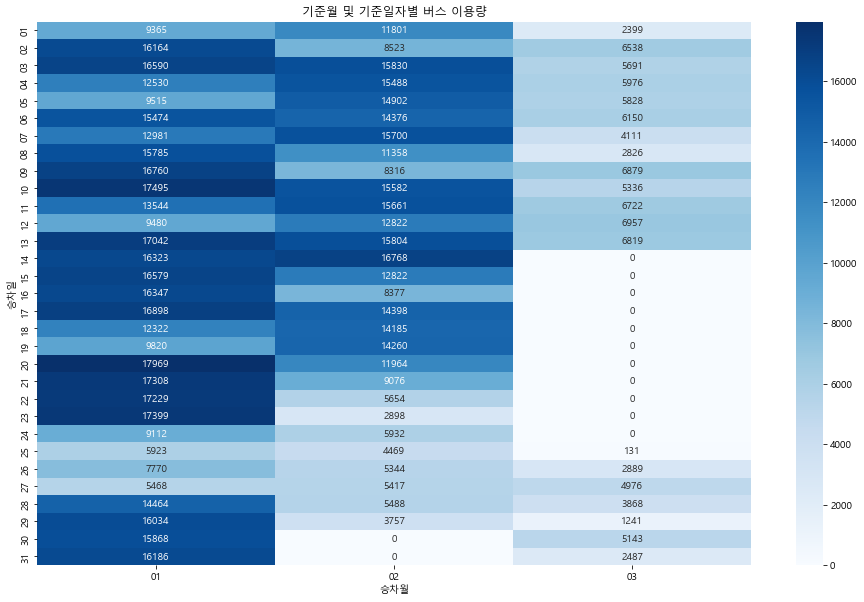

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(pivot_df2, annot=True, fmt=".0f", cmap="Blues")
plt.title('기준월 및 기준일자별 버스 이용량')
plt.rc('font',family='Malgun Gothic')
plt.show()

코로나환자 수가 증가하면서 버스 이용자수가 줄어드는 것을 볼 수 있음.
3월 14일 부터 24일까지의 데이터는 전산상의 문제로 인해 측정되지 않았음.

### 기준일 및 시간대별 버스 이용량 분석 비교

In [44]:
df3 = df2[['승차시','승차일','승객연령']]

In [45]:
pivot_df3 = df3.pivot_table(values='승객연령',
                            index = '승차시', 
                            columns='승차일',
                            aggfunc='count')
pivot_df3

승차일,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
승차시,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,215.0,200.0,281.0,259.0,240.0,272.0,234.0,213.0,234.0,246.0,...,169.0,132.0,163.0,71.0,125.0,157.0,200.0,146.0,84.0,121.0
06,613.0,683.0,890.0,906.0,759.0,959.0,823.0,643.0,718.0,839.0,...,518.0,408.0,437.0,311.0,388.0,458.0,614.0,467.0,321.0,403.0
07,877.0,1422.0,1987.0,1799.0,1440.0,2057.0,1684.0,1334.0,1534.0,1990.0,...,1202.0,870.0,875.0,526.0,671.0,824.0,1173.0,1087.0,804.0,856.0
08,1417.0,2099.0,2629.0,2245.0,1919.0,2676.0,2294.0,1851.0,2042.0,2559.0,...,1566.0,1205.0,1004.0,594.0,867.0,1066.0,1581.0,1421.0,1060.0,1140.0
09,1393.0,2133.0,2626.0,2222.0,1959.0,2619.0,2315.0,1875.0,2161.0,2582.0,...,1711.0,1310.0,1105.0,591.0,858.0,1040.0,1577.0,1502.0,1163.0,1157.0
10,1518.0,2117.0,2668.0,2366.0,2046.0,2423.0,2281.0,1980.0,2161.0,2680.0,...,1642.0,1345.0,1126.0,583.0,976.0,968.0,1514.0,1481.0,1571.0,1176.0
11,1671.0,2293.0,2783.0,2460.0,2138.0,2673.0,2369.0,2174.0,2249.0,2911.0,...,1861.0,1449.0,1029.0,658.0,969.0,1075.0,1538.0,1541.0,1638.0,1225.0
12,1811.0,2291.0,2694.0,2643.0,2237.0,2606.0,2310.0,2253.0,2365.0,2871.0,...,1896.0,1552.0,1056.0,693.0,1070.0,1058.0,1734.0,1669.0,1592.0,1409.0


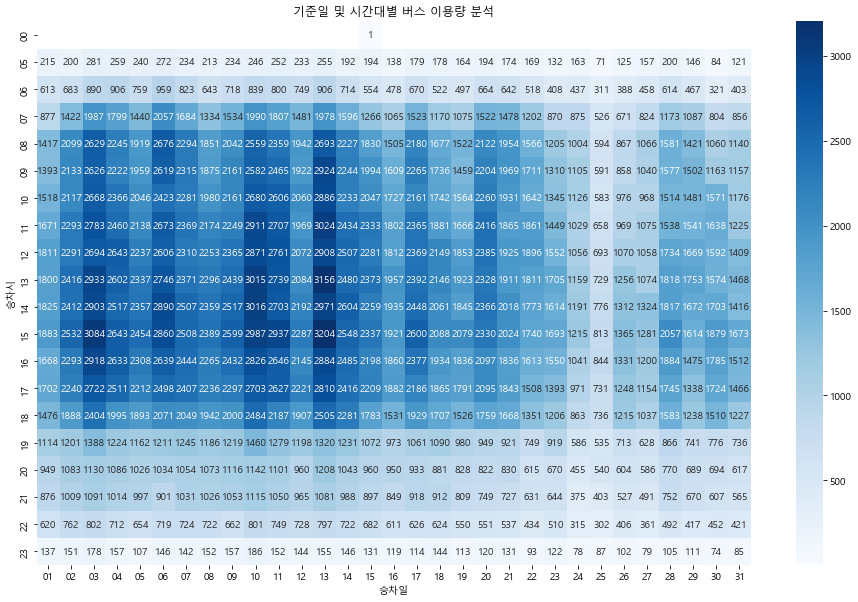

In [46]:
plt.figure(figsize=(16,10))
sns.heatmap(pivot_df3, annot=True, fmt=".0f", cmap="Blues")
plt.title('기준일 및 시간대별 버스 이용량 분석')
plt.rc('font',family='Malgun Gothic')
plt.show()

### 기준시간 및 시간(분)별 버스 이용량 분석 비교

In [53]:
df4 =  df2[['승차분','승차시','승객연령']]
df4

,승차분,승차시,승객연령
0,15,05,일반
1,16,05,일반
2,18,05,일반
3,21,05,청소년
4,22,05,일반
...,...,...,...
841678,36,23,일반
841679,37,23,일반
841680,40,23,일반
841681,43,23,일반


In [58]:
pivot_df4 = df4.pivot_table(values='승객연령',
                            index = '승차분', 
                            columns='승차시',
                            aggfunc='count')
pivot_df4

승차시,00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
승차분,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,248.0,434.0,1038.0,1128.0,878.0,898.0,980.0,979.0,998.0,1107.0,1010.0,937.0,868.0,599.0,421.0,429.0,366.0,180.0
01,NaN,NaN,237.0,387.0,871.0,1114.0,805.0,1130.0,1028.0,1104.0,961.0,1180.0,903.0,1084.0,960.0,731.0,475.0,527.0,479.0,206.0
02,NaN,NaN,186.0,390.0,1007.0,1118.0,916.0,1059.0,1065.0,1107.0,1027.0,1381.0,978.0,1052.0,923.0,607.0,516.0,482.0,334.0,168.0
03,NaN,NaN,211.0,421.0,1025.0,973.0,890.0,870.0,1154.0,971.0,1049.0,1158.0,1090.0,930.0,922.0,603.0,465.0,507.0,358.0,160.0
04,NaN,NaN,252.0,370.0,810.0,1024.0,827.0,1142.0,1094.0,1010.0,920.0,1081.0,958.0,1074.0,1103.0,690.0,467.0,505.0,402.0,168.0
05,NaN,NaN,244.0,451.0,1122.0,1103.0,1006.0,1078.0,1129.0,1147.0,1137.0,1240.0,1225.0,1021.0,1012.0,679.0,507.0,470.0,393.0,120.0
06,NaN,NaN,214.0,429.0,863.0,831.0,927.0,1033.0,1165.0,963.0,1035.0,1116.0,1089.0,916.0,1040.0,521.0,376.0,413.0,321.0,149.0
07,NaN,NaN,255.0,481.0,819.0,949.0,968.0,1097.0,1116.0,1133.0,1089.0,1124.0,1123.0,1158.0,1132.0,719.0,489.0,562.0,442.0,177.0
08,1.0,NaN,232.0,593.0,800.0,923.0,1041.0,1001.0,1192.0,1106.0,1217.0,1260.0,1274.0,1015.0,1094.0,722.0,503.0,479.0,418.0,174.0


In [59]:
pivot_df4 = pivot_df4.fillna(0)

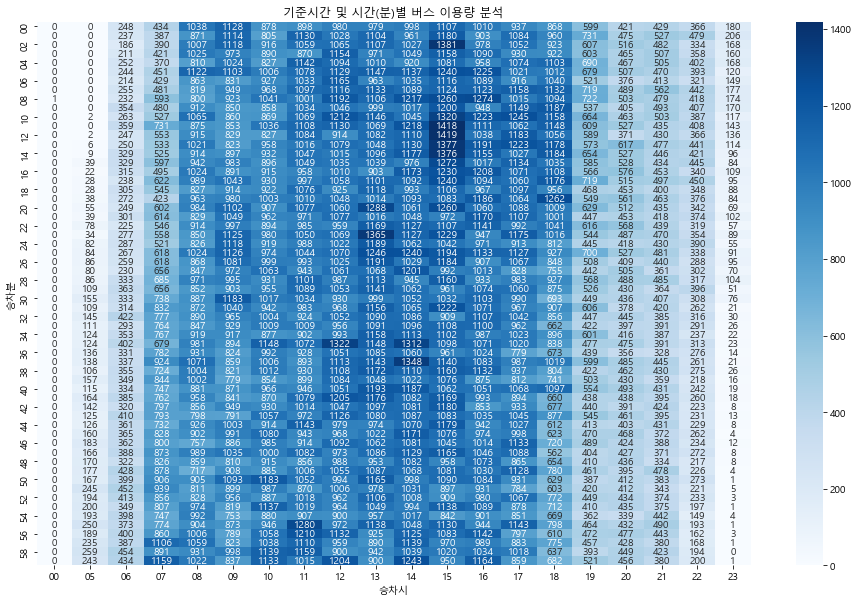

In [61]:
plt.figure(figsize=(16,10))
sns.heatmap(pivot_df4, annot=True, fmt=".0f", cmap="Blues")
plt.title('기준시간 및 시간(분)별 버스 이용량 분석')
plt.rc('font',family='Malgun Gothic')
plt.show()

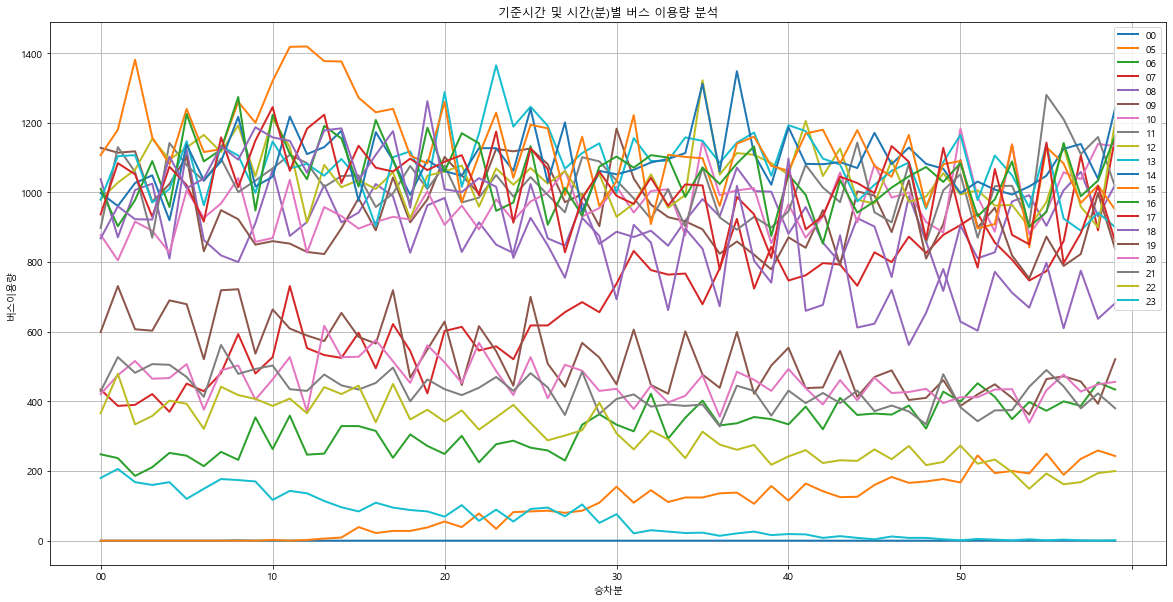

In [66]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20,10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc('font', family = 'Malgun Gothic', size=10)

# 데이터 넣기
pivot_df4.plot()

plt.title('기준시간 및 시간(분)별 버스 이용량 분석')
plt.ylabel('버스이용량')

# 범례 위치 변경하기
plt.legend(loc='upper right')

# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()